In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [5]:
df.tail()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0
55691,55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,...,15.0,1.0,0.8,26.0,29.0,41.0,Y,0,Y,1


In [6]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df1 = pd.get_dummies(df, columns=['gender', 'oral', 'tartar'], drop_first=True)

In [9]:
df1

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,False,True
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,False,True
2,2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,1,True,False
3,3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,True,True
4,4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,12.3,1.0,0.6,14.0,7.0,10.0,1,0,False,True
55688,55681,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,False,True
55689,55683,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,False,False
55690,55684,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,0,True,False


In [10]:
df1.dtypes=='object'

ID                     False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
smoking                False
gender_M               False
tartar_Y               False
dtype: bool

In [11]:
mm = MinMaxScaler()
df1 = pd.DataFrame(mm.fit_transform(df1), columns=df1.columns)

In [12]:
df1

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
0,0.000000,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.0,0.0,0.254438,...,0.493827,0.0,0.052174,0.009195,0.006179,0.026052,0.0,0.0,0.0,1.0
1,0.000018,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.0,0.0,0.284024,...,0.481481,0.0,0.043478,0.012261,0.006179,0.017034,0.0,0.0,0.0,1.0
2,0.000036,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.0,0.0,0.396450,...,0.672840,0.0,0.078261,0.011494,0.005149,0.021042,0.0,1.0,1.0,0.0
3,0.000054,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.0,0.0,0.171598,...,0.604938,0.0,0.078261,0.009962,0.008582,0.017034,0.0,0.0,1.0,1.0
4,0.000072,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.0,0.0,0.289941,...,0.469136,0.0,0.043478,0.007663,0.004463,0.021042,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0.999731,0.307692,0.666667,0.333333,0.307692,0.081633,0.081633,0.0,0.0,0.230769,...,0.456790,0.0,0.043478,0.006130,0.002060,0.009018,1.0,0.0,0.0,1.0
55688,0.999820,0.384615,0.500000,0.190476,0.243590,0.112245,0.112245,0.0,0.0,0.177515,...,0.561728,0.0,0.069565,0.010728,0.003776,0.013026,0.0,0.0,0.0,1.0
55689,0.999856,0.538462,0.500000,0.190476,0.224359,0.091837,0.112245,0.0,0.0,0.272189,...,0.462963,0.0,0.034783,0.008429,0.003433,0.011022,0.0,0.0,0.0,0.0
55690,0.999874,0.615385,0.583333,0.285714,0.346154,0.071429,0.091837,0.0,0.0,0.366864,...,0.586420,0.0,0.052174,0.010728,0.006179,0.017034,0.0,0.0,1.0,0.0


In [13]:
df1.drop(columns='ID', axis=1, inplace=True)

<AxesSubplot:xlabel='gender', ylabel='smoking'>

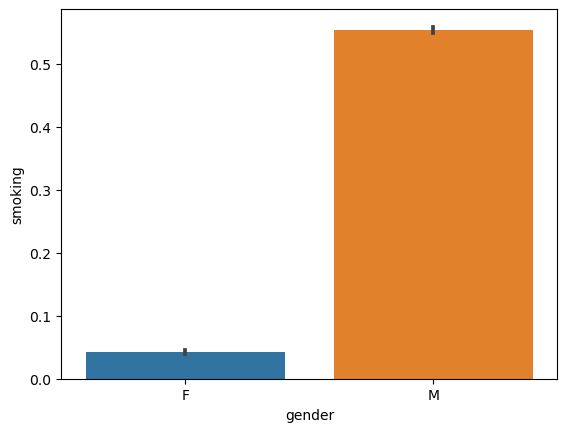

In [14]:
sns.barplot(x=df['gender'], y =df['smoking'])

<AxesSubplot:xlabel='gender', ylabel='count'>

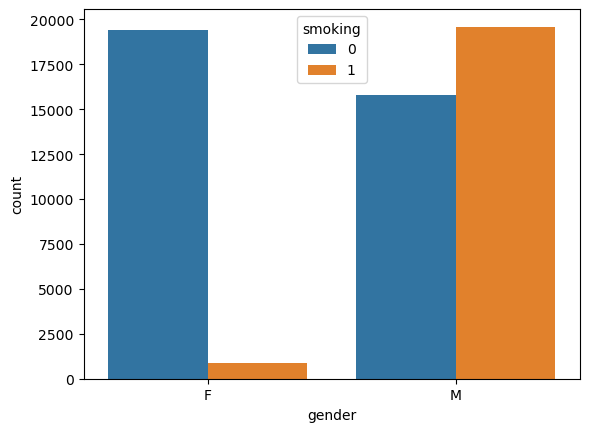

In [15]:
sns.countplot(x=df['gender'], hue=df['smoking'])

<AxesSubplot:ylabel='count'>

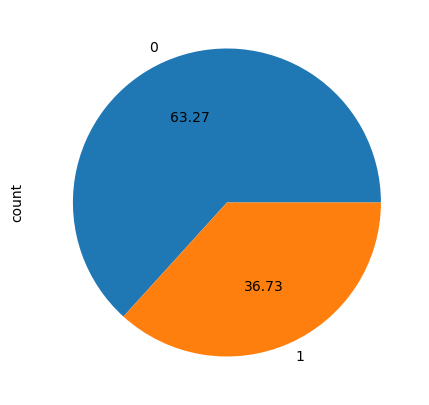

In [16]:
plt.figure(figsize=(10,5))
df['smoking'].value_counts().plot.pie(autopct = "%0.2f")

<AxesSubplot:xlabel='age', ylabel='Count'>

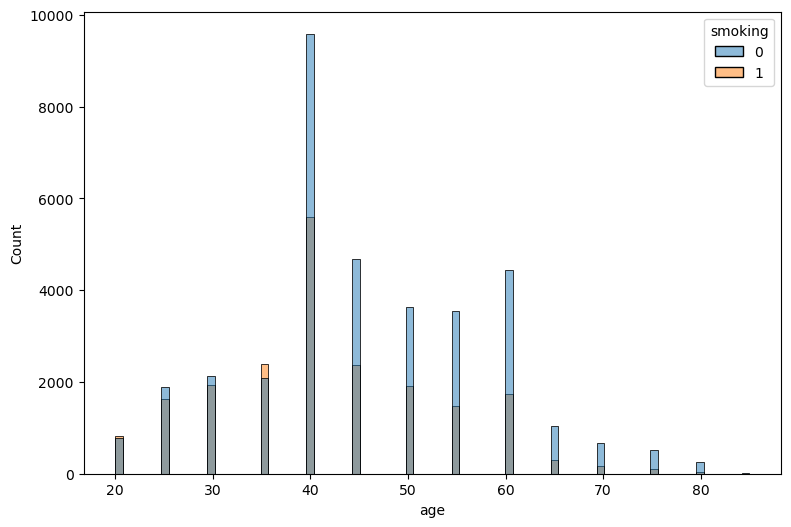

In [17]:
plt.figure(figsize=(9,6))
sns.histplot(x = df['age'], hue=df['smoking'])

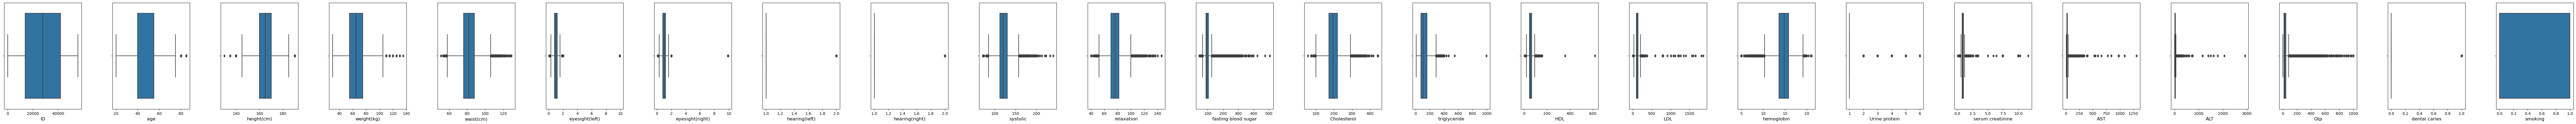

In [18]:
nrows = 1
ncols = len(df.select_dtypes(include=['int64', 'float64']).columns)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*5))

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()


In [19]:
len(df.select_dtypes(include=['int64', 'float64']).columns)

24

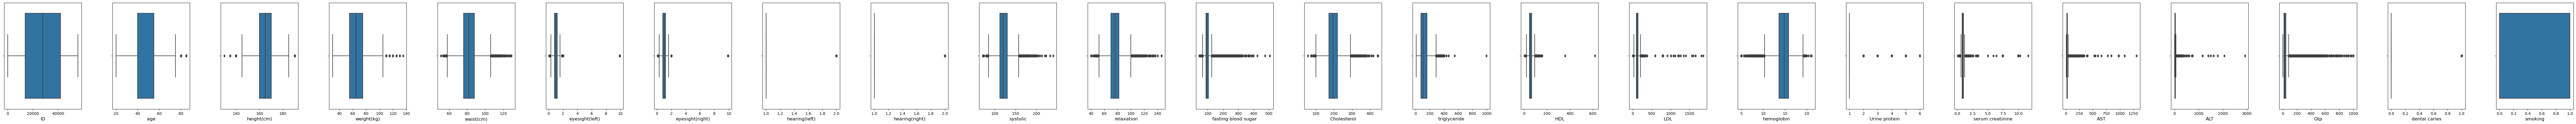

In [20]:
nrows = 1
ncols = len(df.select_dtypes(include=['int64', 'float64']).columns)

fig, axes = plt.subplots(nrows =nrows, ncols=ncols, figsize = (ncols*5, nrows*5))

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(col,fontsize=12)

plt.subplots_adjust(wspace=0.4)
plt.show()

In [21]:
df['dental caries']

0        0
1        0
2        0
3        0
4        0
        ..
55687    1
55688    0
55689    0
55690    0
55691    0
Name: dental caries, Length: 55692, dtype: int64

In [22]:
df['dental caries'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 55692 entries, 0 to 55691
Series name: dental caries
Non-Null Count  Dtype
--------------  -----
55692 non-null  int64
dtypes: int64(1)
memory usage: 435.2 KB


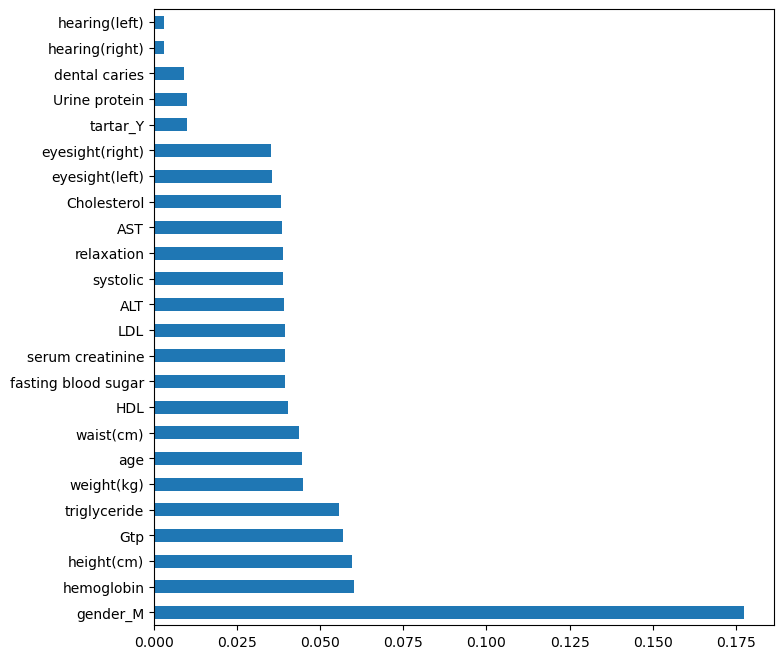

In [23]:
x = df1.drop(columns='smoking')
y = df1['smoking']

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

df3 = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(8,8))
df3.nlargest(24).plot(kind='barh')
plt.show()

In [33]:
x = df1.drop(columns=['hearing(left)', 'hearing(right)', 'dental caries', 'tartar_Y','eyesight(left)',  'eyesight(right)', 'Cholesterol','AST'], axis=1)
y = df1['smoking']

x_train,x_test,y_test,y_train = train_test_split(x,y,train_size=0.8, random_state=42)

lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [44553, 11139]

In [31]:
df1

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
0,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.0,0.0,0.254438,0.311321,...,0.493827,0.0,0.052174,0.009195,0.006179,0.026052,0.0,0.0,0.0,1.0
1,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.0,0.0,0.284024,0.283019,...,0.481481,0.0,0.043478,0.012261,0.006179,0.017034,0.0,0.0,0.0,1.0
2,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.0,0.0,0.396450,0.433962,...,0.672840,0.0,0.078261,0.011494,0.005149,0.021042,0.0,1.0,1.0,0.0
3,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.0,0.0,0.171598,0.188679,...,0.604938,0.0,0.078261,0.009962,0.008582,0.017034,0.0,0.0,1.0,1.0
4,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.0,0.0,0.289941,0.320755,...,0.469136,0.0,0.043478,0.007663,0.004463,0.021042,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0.307692,0.666667,0.333333,0.307692,0.081633,0.081633,0.0,0.0,0.230769,0.264151,...,0.456790,0.0,0.043478,0.006130,0.002060,0.009018,1.0,0.0,0.0,1.0
55688,0.384615,0.500000,0.190476,0.243590,0.112245,0.112245,0.0,0.0,0.177515,0.207547,...,0.561728,0.0,0.069565,0.010728,0.003776,0.013026,0.0,0.0,0.0,1.0
55689,0.538462,0.500000,0.190476,0.224359,0.091837,0.112245,0.0,0.0,0.272189,0.301887,...,0.462963,0.0,0.034783,0.008429,0.003433,0.011022,0.0,0.0,0.0,0.0
55690,0.615385,0.583333,0.285714,0.346154,0.071429,0.091837,0.0,0.0,0.366864,0.339623,...,0.586420,0.0,0.052174,0.010728,0.006179,0.017034,0.0,0.0,1.0,0.0


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [82]:
df = pd.read_csv('smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,55692.0,27845.500000,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
age,55692.0,44.182917,12.071418,20.0,40.00,40.0,55.00,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.00,165.0,170.00,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.00,65.0,75.00,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.00,82.0,88.00,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.80,1.0,1.20,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.80,1.0,1.20,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.00,1.0,1.00,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.00,1.0,1.00,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.00,120.0,130.00,240.0


In [84]:
df.duplicated().sum()

0

In [85]:
df.drop(columns=['ID', 'oral'], inplace=True)

In [86]:
df.shape

(55692, 25)

In [87]:
df.smoking.value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

In [88]:
col_lst = []

for i in df.columns:
    if (df[i].dtypes==object):
        col_lst.append(i)

In [89]:
lb = LabelEncoder()

In [90]:
for i in col_lst:
    df[i] = lb.fit_transform(df[i])
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


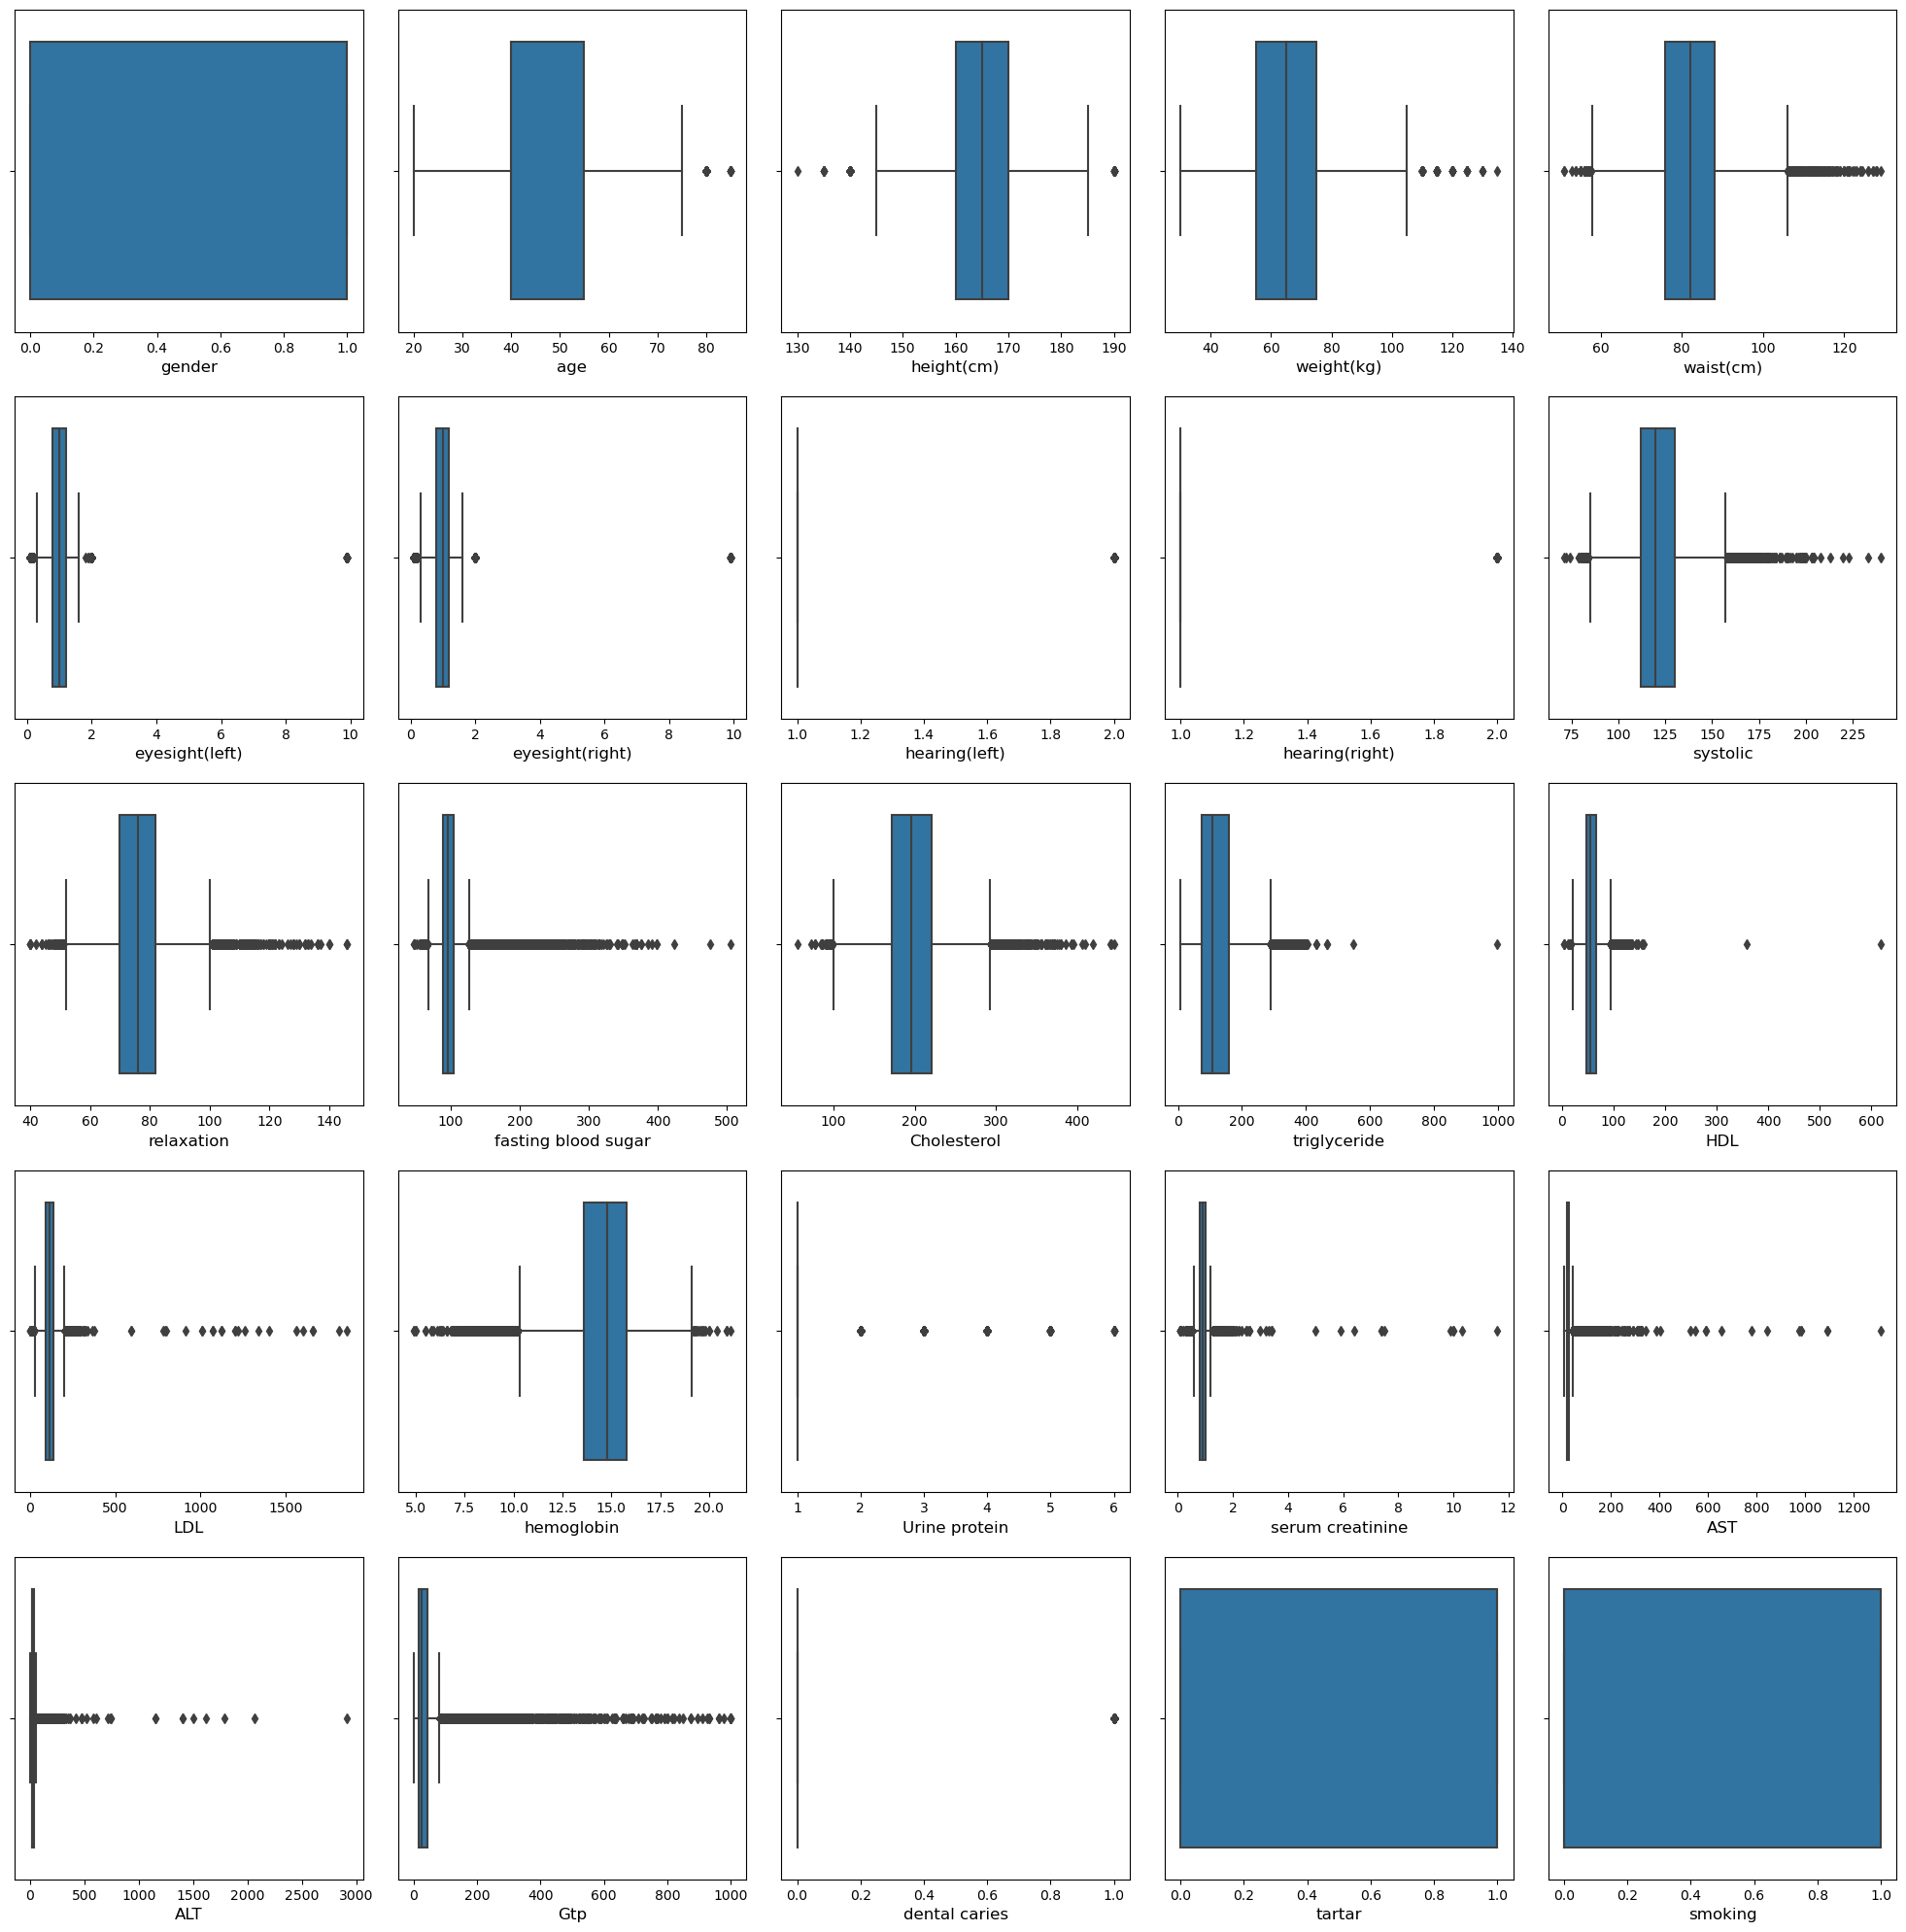

In [91]:
nrows = 5
ncols = 5

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize = (ncols*5, nrows*5))

for i, j in enumerate(df.select_dtypes(include=['int32','int64','float64']).columns):
    rows = i//ncols
    cols = i%ncols
    sns.boxplot(x = df[j], ax=axes[rows,cols])
    axes[rows, cols].set_xlabel(j, fontsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

In [92]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

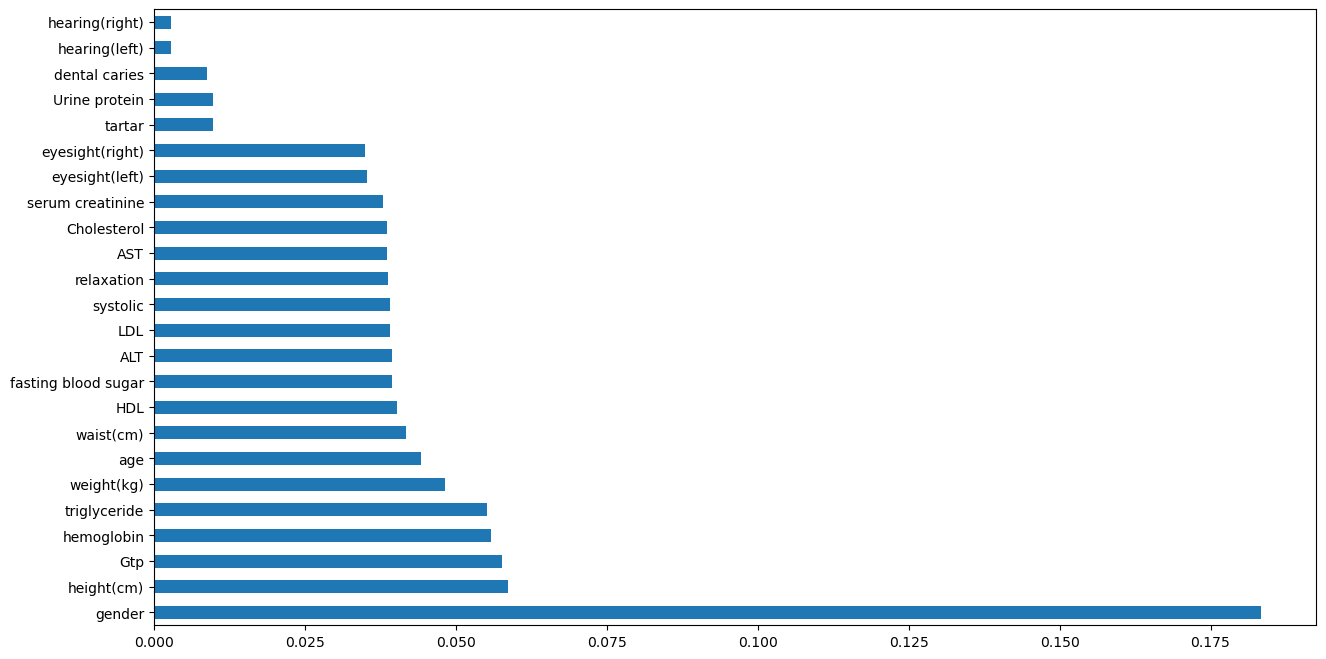

In [93]:
plt.figure(figsize=(15,8))

et = ExtraTreesClassifier()
et.fit(x,y)

df1 = pd.Series(et.feature_importances_, index=x.columns)
df1.nlargest(24).plot(kind='barh')
plt.show()

In [94]:
df2 = pd.DataFrame(df1.sort_values(ascending=False))
df2

,0
gender,0.183383
height(cm),0.058675
Gtp,0.057573
hemoglobin,0.055868
triglyceride,0.055138
weight(kg),0.048261
age,0.044207
waist(cm),0.041667
HDL,0.040244
fasting blood sugar,0.039494


In [96]:
x = df[['gender','height(cm)','Gtp','triglyceride','hemoglobin','waist(cm)', 'weight(kg)', 'age', 'HDL', 
        'fasting blood sugar', 'ALT','systolic', 'LDL', 'relaxation', 'Cholesterol']]

y = df['smoking']

In [97]:
from sklearn.preprocessing import StandardScaler

In [100]:
ss = StandardScaler()

x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)
x

,gender,height(cm),Gtp,triglyceride,hemoglobin,waist(cm),weight(kg),age,HDL,fasting blood sugar,ALT,systolic,LDL,relaxation,Cholesterol
0,-1.320858,-1.049465,-0.257550,-0.623481,-1.101061,-0.080484,-0.457476,-0.346517,1.065868,-0.255457,-0.259666,-0.547989,0.269644,-0.310442,0.498616
1,-1.320858,-0.505663,-0.436511,-0.162840,-1.228898,-0.112832,-0.457476,-0.346517,-1.037419,1.475695,-0.259666,-0.182381,0.294079,-0.620386,-0.135034
2,0.757084,0.581943,-0.356973,0.772403,0.752585,-0.220659,-0.457476,0.896099,-0.155395,-0.495894,-0.356604,1.206928,0.880501,1.032645,1.242467
3,0.757084,0.038140,-0.436511,1.777440,0.049478,0.641955,0.322543,-0.346517,-0.833875,-0.159282,-0.033477,-1.571690,2.713072,-1.653530,3.446468
4,-1.320858,-1.049465,-0.356973,-0.735152,-1.356736,0.426302,-0.457476,-0.346517,0.319540,-0.928682,-0.421230,-0.109259,-0.194607,-0.207128,-0.355434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,-1.320858,0.581943,-0.595589,-0.386181,-1.484574,-0.759792,-0.067467,-0.346517,1.201564,-0.495894,-0.647419,-0.840475,0.074170,-0.827014,0.443516
55688,-1.320858,-0.505663,-0.516050,-0.804946,-0.397954,-1.298926,-1.237496,0.067688,1.065868,-0.495894,-0.485855,-1.498568,-0.878767,-1.446901,-0.851335
55689,-1.320858,-0.505663,-0.555819,-0.693276,-1.420655,-1.460666,-1.237496,0.896099,1.472956,-0.543982,-0.518168,-0.328624,-1.269715,-0.413757,-1.071735
55690,0.757084,0.038140,-0.436511,-0.665358,-0.142278,-0.436312,-0.457476,1.310304,-0.630331,0.369681,-0.259666,0.841320,0.758330,-0.000499,0.360866


In [104]:
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8, random_state=42, stratify=y)

In [111]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
accuracy_score(y_test,y_pred)

0.734805637848999

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7048
           1       0.63      0.69      0.66      4091

    accuracy                           0.73     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.73      0.74     11139



In [112]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.7794236466469162

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      7048
           1       0.70      0.70      0.70      4091

    accuracy                           0.78     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.78      0.78     11139



In [114]:
rd = RandomForestClassifier()
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
accuracy_score(y_test,y_pred)

0.8263757967501572

In [115]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000)
bc.fit(x_train,y_train)
y_pred = bc.predict(x_test)
accuracy_score(y_test,y_pred)

0.8264655714157465

In [116]:
et = ExtraTreesClassifier(n_estimators=1000, random_state=42)
et.fit(x_train,y_train)
y_pred = et.predict(x_test)
accuracy_score(y_test,y_pred)

0.8269144447436934